In [ ]:
import numpy as np
vec_file = r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws8_bs8192_ns5_sougou'
# 读取 .npy 文件
word_to_vector = np.load(os.path.join(vec_file, 'word_vectors.npy'), allow_pickle=True).item()
for i in ["北京", "上海", "广州", "深圳", "杭州", "成都", "武汉", "西安"]:
    if i not in word_to_vector:
        print(i)

In [ ]:
# ns=5 ws=[2,4,6,8]实验结果
dirs = [
    r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws2_bs512_ns5',
    r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws4_bs512_ns5',
    r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws6_bs512_ns5',
    r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws8_bs512_ns5',
]

In [ ]:
# ws=4 ns=[1,3,5,7]实验结果
dirs = [
    r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws4_bs512_ns1',
    r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws4_bs512_ns3',
    r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws4_bs512_ns5',
    r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws4_bs512_ns7',
]

In [ ]:
# CBOW & SkipGram实验结果
dirs = [
    r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws4_bs512_ns5_en',
    r'/home/yifei/code/word2vec/runs/SkipGram_experiment/lr0.001_ws4_bs512_ns5_en'
]

In [ ]:
# 使用英文大语料text8实验结果
dirs = [
    r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws4_bs512_ns5_en',
    r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws8_bs8192_ns5_text8'
]

In [1]:
# 使用中文大语料库sougou实验结果
dirs = [
    r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws4_bs512_ns5_zh',
    r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws8_bs8192_ns5_sougou'
]

In [ ]:
# 英文语料的评估词
words = {
    "pronouns": ["i", "you", "he", "she", "it", "we", "they", "me", "him", "her", "us", "them"],
    "verbs": ["run", "jump", "eat", "sleep", "read", "write", "play", "sing"],
}

# 颜色映射
color_map = {
    'pronouns': 'blue',
    'verbs': 'green',
}

In [2]:
# 中文语料的评估词
words = {
    "locations": ["北京", "上海", "广州", "深圳", "杭州", "成都", "武汉", "西安"],  # 地点名词
    "objects": ["书", "手机", "电脑", "车", "相机", "电视", "冰箱", "空调", "鞋子"],  # 物品名词
}

# 颜色映射
color_map = {
    'locations': 'blue',
    'objects': 'green',
}

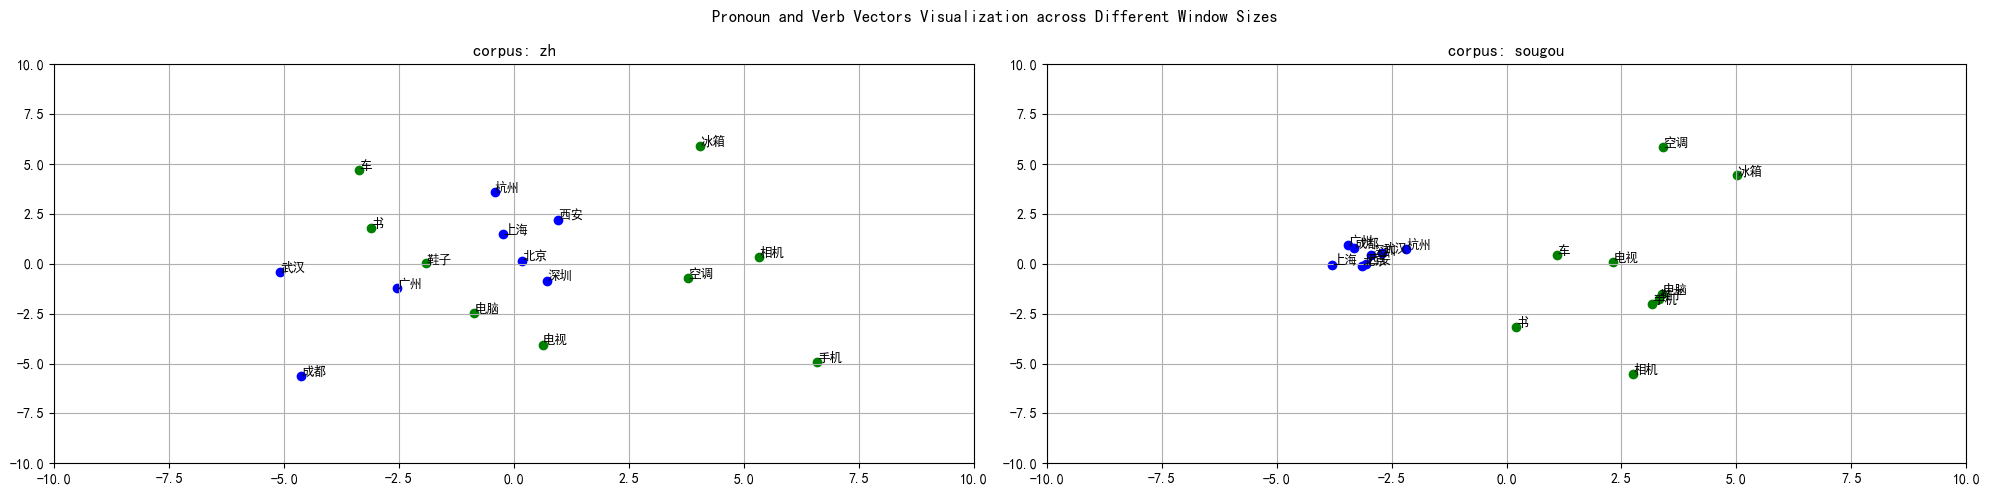

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体（SimHei）显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决坐标轴负号显示问题
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE




def visualize_word_vectors(ax, word_to_vector, words, method='pca', title=""):
    """
    可视化人称代词和动词的词向量，按词类分颜色显示。
    
    参数：
    - ax: 子图的坐标轴对象
    - word_to_vector: dict, 包含词和对应向量的字典。
    - words: dict, 包含不同类别词汇的字典。
    - method: str, 降维方法 ('pca' 或 'tsne')。
    - title: str, 子图的标题
    """
    # 提取词向量和标签
    vectors = []
    labels = []
    colors = []

    for category, word_list in words.items():
        for word in word_list:
            vector = word_to_vector.get(word)
            if vector is not None:
                vectors.append(vector)
                labels.append(word)
                colors.append(color_map[category])  # 使用对应类别的颜色
    
    # 转换为 NumPy 数组
    vectors = np.array(vectors)
    
    # 降维
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=0)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'")
    
    reduced_vectors = reducer.fit_transform(vectors)
    
    # 可视化
    for i, label in enumerate(labels):
        x, y = reduced_vectors[i]
        ax.scatter(x, y, color=colors[i], label=label if label not in [text.get_text() for text in ax.texts] else "")
        ax.text(x + 0.01, y + 0.01, label, fontsize=9)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_title(title)
    ax.grid(True)

# 创建子图
fig, axes = plt.subplots(1, len(dirs), figsize=(20, 5))
for i, vec_dir in enumerate(dirs):
    # 读取词向量文件
    word_to_vector = np.load(os.path.join(vec_dir, 'word_vectors.npy'), allow_pickle=True).item()
    if i == 0: title = "corpus: zh"
    else: title = "corpus: sougou"

    # 调用函数绘制子图
    visualize_word_vectors(axes[i], word_to_vector, words, method='pca', title=title)

plt.suptitle("Pronoun and Verb Vectors Visualization across Different Window Sizes")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

def cosine_similarity(vec1, vec2):
    """计算两个向量之间的余弦相似度"""
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def get_top_similar_words(word_to_vector, target_word, top_n=5):
    """
    获取与目标词最相近的前N个词
    
    参数：
    - word_to_vector: dict, 包含词和其对应向量的字典。
    - target_word: str, 目标词。
    - top_n: int, 返回的相似词个数。
    
    返回：
    - List of tuples, 每个元组包含一个词及其与目标词的相似度。
    """
    target_vector = word_to_vector.get(target_word)
    if target_vector is None:
        return f"'{target_word}' 不在词向量字典中。"

    # 计算相似度并排序
    similarities = []
    for word, vector in word_to_vector.items():
        if word != target_word:  # 排除目标词本身
            sim = cosine_similarity(target_vector, vector)
            similarities.append((word, sim))
    
    # 按相似度降序排序并取前N个
    most_similar = sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]
    return most_similar

target_word = 'our'

vec_dir = r'/home/yifei/code/word2vec/runs/CBOW_experiment/lr0.001_ws8_bs8192_ns5_text8'
word_to_vector = np.load(os.path.join(vec_dir, 'word_vectors.npy'), allow_pickle=True).item()

top_similar_words = get_top_similar_words(word_to_vector, target_word)
print(f"与'{target_word}'最相近的词：", top_similar_words)

In [ ]:
import torch

pt_pth = r'/mnt/shared/unibench/models/semantic-clip/best_model.pth'
out_pt_pth = r'/mnt/shared/unibench/models/semantic-clip/best_model.pth'

# 加载原始的 .pt 文件
checkpoint = torch.load(pt_pth)

# 提取 model_state_dict
model_state_dict = checkpoint["model_state_dict"]

# 将提取的 model_state_dict 保存为新的 .pt 文件
torch.save(model_state_dict, out_pt_pth)

In [ ]:
with open('/home/yifei/code/word2vec/data/text8', 'r') as f:
    data = f.readlines()
data[0][100]

In [ ]:
import matplotlib as mpl
mpl.get_cachedir()

In [ ]:
import matplotlib.font_manager as fm

# 获取系统中所有字体名称
for font in fm.fontManager.ttflist:
    print(font.name)